# Dealing evil

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 12](https://img.shields.io/badge/Jump%20to-Level%2012-blue?style=flat-square)](http://www.pythonchallenge.com/pc/return/evil.html)

<center><img src="../../resources/imgs/Quiz12-1.png" /></center>

In [1]:
from requests import post
from bs4 import BeautifulSoup

In [2]:
response = post(
    'http://www.pythonchallenge.com/pc/return/evil.html',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
response = BeautifulSoup(response.text, features='html.parser')
print(response.prettify())

<html>
 <head>
  <title>
   dealing evil
  </title>
  <link href="../style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <center>
   <img src="evil1.jpg"/>
   <br/>
  </center>
 </body>
</html>



&emsp;&emsp;网页源代码中的图片链接显示为`evil1.jpg`，那么会不会还有其他的图片呢？先爬一下。

In [3]:
from PIL import Image
from io import BytesIO

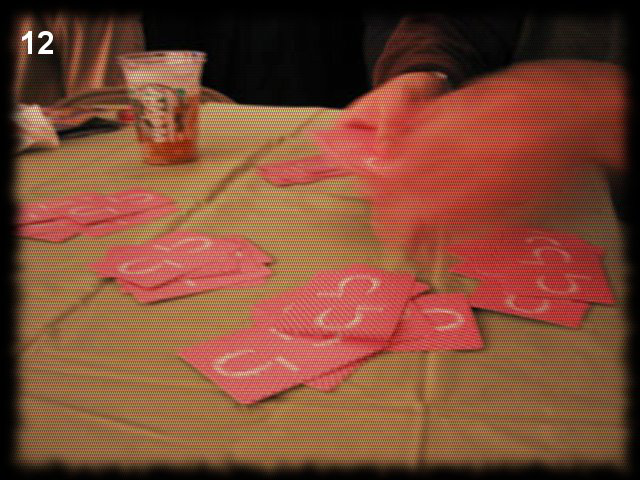

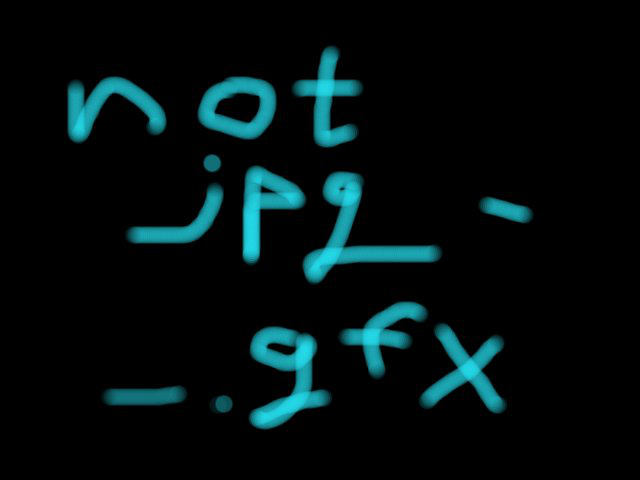

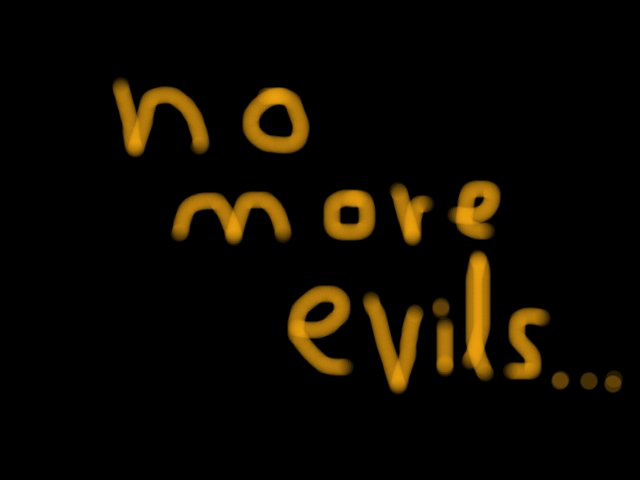

In [4]:
for k in range(1, 4):
    response = post(
        'http://www.pythonchallenge.com/pc/return/evil' + str(k) + '.jpg',
        headers={'Authorization': 'Basic aHVnZTpmaWxl'}
    )
    try:
        response = Image.open(BytesIO(response.content))
        display(response)
    except OSError:
        response = BeautifulSoup(response.text, features='html.parser')
        print(response.prettify())

&emsp;&emsp;多次测试后，我们共发现3张图片。其中：

- `evil1.jpg`将一副扑克牌分成5份，可能有一个数据文件也需要我们如此拆分为5份。
- `evil2.jpg`告诉我们后缀名是`.gfx`而不是`.jpg`。
- `evil3.jpg`是误导，告诉我们**没有更多的恶魔了**。

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

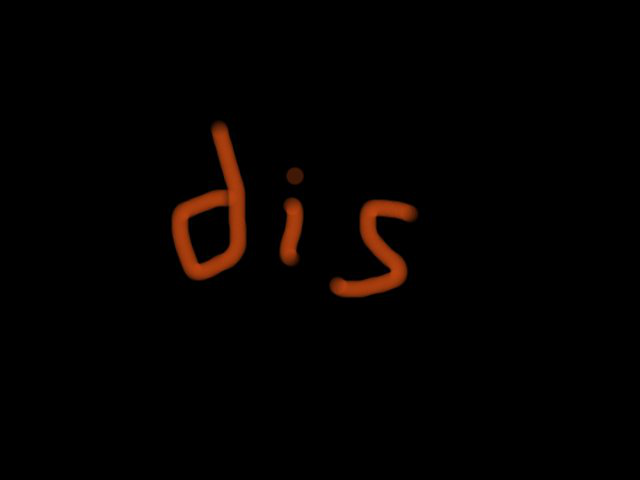

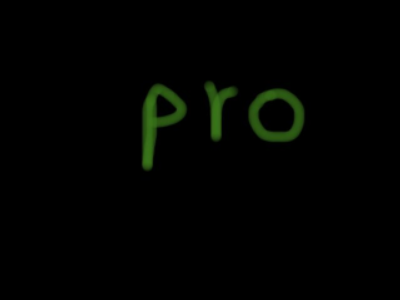

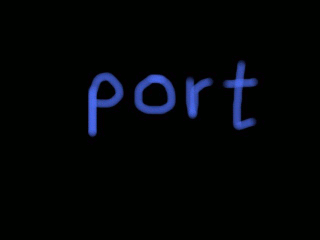

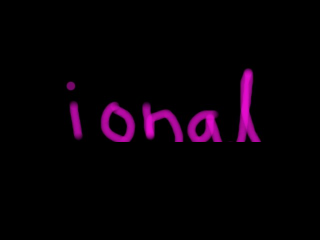

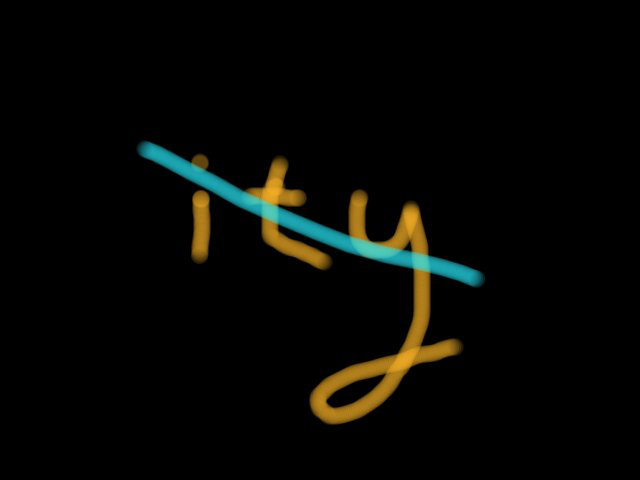

In [6]:
# 下载数据
response = post(
    'http://www.pythonchallenge.com/pc/return/evil2.gfx',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
# 显示图片
for k in range(5):
    display(Image.open(BytesIO(response.content[k::5]))) 

&emsp;&emsp;通过以上5张图片，我们可以获得单词`disprotional`，因此下一关的链接为：<http://www.pythonchallenge.com/pc/return/disproportional.html>。